In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (7, 3)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./../datasets/bengaluru_house_prices.csv")

# display total rows and columns number
print(df.shape)

# show top five rows
df.head()

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## 1. Data Cleaning

In [3]:
# frequency of each unique value in area_type feature
df.groupby(['area_type'])["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
# remove unnecessary columns/features and store the rest in a new dataframe
new_df = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)

# check the new columns 
print(new_df.shape)

# show top 5 rows
new_df.head()

(13320, 5)


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
# check for null value in each column
new_df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
# drop the rows with null values as it will not have any much effect on the whole dataset
new_df.dropna(inplace=True)

# check the total rows after dropping rows with null values
new_df.shape

(13246, 5)

In [8]:
# check unique value of size features/columns
new_df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
# create new column 'bhk' and insert the numerical value of size column
new_df['bhk'] = new_df['size'].apply(lambda x: int(x.split(' ')[0]))

# check the unique values of bhk
np.sort(new_df.bhk.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 18, 19,
       27, 43], dtype=int64)

In [10]:
#
new_df[new_df['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [11]:
# function to check if value is float
def is_float(x):
    try:
        float(x)
        
# if except is written without ValueError it will not return the False
    except ValueError:
        return False
    return True

In [12]:
# convert a number into float and if it cannot be converted return it's value
new_df[~new_df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [13]:
# count number which are not float in the total_sqft column
len(new_df[~new_df['total_sqft'].apply(is_float)])

190

In [14]:
# to convert range value such as 2000-3100 to a floating point by taking average through function
def to_float(x):
    convert = x.split("-")
    if len(convert)==2:
        return (float(convert[0])+float(convert[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
new_df1 = new_df.copy()

new_df1['total_sqft'] = new_df['total_sqft'].apply(to_float)

In [16]:
new_df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


## 2. Feature Engineering

In [17]:
new_df2 = new_df1.copy()

# create a new column which shows price per square feet
new_df2['price_per_sqft'] = (new_df1['price']*100000)/new_df1['total_sqft']
new_df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [18]:
len(new_df2.location.unique())

1304

we learn from above that there are 1304 unique location which is quite many and to transform them into dummies variable would be hectic so we must find a way to remove some of them which have like just 1 or 2 or very less number of data or information

In [19]:
# remove any place at the beginning and end of the string if it exist
new_df2['location'] = new_df2['location'].apply(lambda x: x.strip())

In [20]:
# show number of data per location 
statistics_locations = new_df2.groupby(['location'])['location'].agg('count').sort_values(ascending=False)
statistics_locations

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [21]:
# location which have data less than 11
location_less_than_11 = statistics_locations[statistics_locations<11]
len(location_less_than_11)
location_less_than_11

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [22]:
len(new_df2.location.unique())

1293

In [23]:
new_df2['location'] = new_df2['location'].apply(lambda x: 'other' if x in location_less_than_11 else x)
len(new_df2.location.unique())                     

242

In [24]:
new_df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## 3. Outlier Removal

remove size of 1 bhk that is smaller than 300 which is the usual size of bed in bhk. 

In [28]:

new_df2[(new_df2.total_sqft/new_df2.bhk) < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [29]:
new_df3  = new_df2[~((new_df3.total_sqft/new_df3.bhk)<300)]
new_df3.shape

(12502, 7)

In [40]:
new_df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


now check the price on each location and remove outlier that are below and above some minimum and maximum value using mean - standard deviation

In [54]:
def remove_ppsfpl_outlier(df):
    df_out = pd.DataFrame()
    for loca, dser in df.groupby(['location']):
        me = np.mean(dser.price_per_sqft)
        stdd = np.std(dser.price_per_sqft)
        new_dser = dser[(dser.price_per_sqft > (me - stdd)) & (dser.price_per_sqft <=(me + stdd))]
        df_out = pd.concat([df_out, new_dser], ignore_index=True)
    return df_out

In [120]:
new_df4 = remove_ppsfpl_outlier(new_df3)
new_df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


also checking for outliers where different bhk like 2 and 3 bhk might have very close or even 2bhk more expensive than 3 bhk in some cases. We need to remove those.

In [124]:
# let's plot for 2 and 3 bhk and see if there is an outlier
def plot_23bhk(df, locate):
    bhk2 = df[(df.location== locate) &(df.bhk==2)]
    bhk3 = df[(df.location== locate) &(df.bhk==3)]
    plt.rcParams['figure.figsize'] = (8, 4)
    plt.scatter( bhk2.total_sqft,bhk2.price, marker="*", color='blue', s=30, label="2 bhk")
    plt.scatter(bhk3.total_sqft,bhk3.price,  marker="+", color='red', s=30, label='3 bhk')    
    plt.ylabel("price ")
    plt.xlabel("total sqft area")
    #plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
    plt.legend()
    plt.title(locate)
    plt.show()

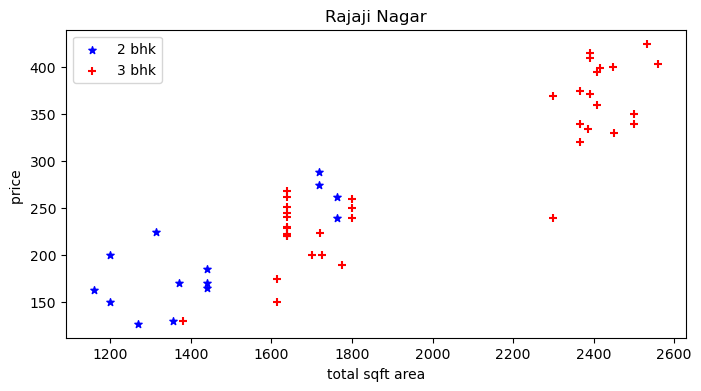

In [125]:
plot_23bhk(new_df4, 'Rajaji Nagar')

## SOME IMPORTANT NOTES

In [90]:
new_df3[(new_df3.location=="1st Block Jayanagar") & ((new_df3.bhk == 2) | (new_df3.bhk ==3))]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
4991,1st Block Jayanagar,2 BHK,1000.0,3.0,60.0,2,6000.000000
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
8507,1st Block Jayanagar,3 BHK,1760.0,3.0,115.0,3,6534.090909
